# Normalización de un vector

Dado un arreglo:
$$
v \in R^{n}
$$
Cuyos elementos cumplen:
$$
v_{i} \in [-10,10]
$$
Se le pide normalizar el arreglo considerando que $\mu$ es la media aritmética de los elementos de $v$ y $\sigma$ es la desviación estándar de los elementos de $v$.

Los elementos del arreglo de salida deben tener esa forma:
$$
o_{i} = (v_{i} - \mu) / \sigma
$$
Luego de normalizar todos los elementos del vector se debe cumplir que $\mu_{o}$ es $0$ y $\sigma_{o}$ es $1$.

Consideraciones para su solución:

- Tome en cuenta la precisión, pero sin priorizarla sobre la rapidez.
- Deberá trabajar con arreglos `numpy`.
- Su función en *Python* que normalizará el arreglo de entrada no puede emplear funciones de ningún módulo, ni predefinidas por el entorno.
- Su función en *C* que normalizará el arreglo de entrada solo puede emplear como función auxiliar la función `sqrt` o alguna de sus variantes.

In [2]:
import random

In [3]:
import numpy as np

In [4]:
def crear_arreglo(tam):
  rango_min = -10.0
  rango_max = 10.0
  return np.asarray([random.uniform(rango_min, rango_max) for _ in range(tam)], dtype=np.float32)

a) (0.5 ptos) Usar la función `crear_arreglo` para crear un arreglo de 16 elementos.

In [5]:
arr_16 = crear_arreglo(16)

b) (2.0 ptos) Implementar en *Python* la función `py_normalizar_arreglo`. Debe recibir un arreglo y devolver el arreglo normalizado.

In [6]:
def py_normalizar_arreglo(arr):
    suma = 0
    arr_norm = []
    for term in arr:
        suma+=term
    media = suma/len(arr)
    sum_desv = 0
    for term in arr:
        sum_desv = sum_desv + (term - media)**2
    desv = (sum_desv/(len(arr)-1))**(1/2)
    for term in arr:
        term_norm = (term-media)/desv
        arr_norm.append(term_norm)
    return arr_norm

c) (0.5 pto) Pruebe la función `py_normalizar_vector` en el arreglo que creó en el ítem (a), y con las funciones `mean` y `stdev` del módulo `statistics` compruebe que la media del arreglo normalizado es cero y la desviación estándar es uno.

In [7]:
import statistics
arr_16_norm = py_normalizar_arreglo(arr_16)
prueba1 = statistics.mean(arr_16_norm)
prueba2 = statistics.stdev(arr_16_norm)
print("La media aritmetica del arreglo normalizado es:",prueba1)
print("La desviacion estandar del arreglo normalizado es:",prueba2)


La media aritmetica del arreglo normalizado es: 1.9081958235744878e-17
La desviacion estandar del arreglo normalizado es: 0.9999999999999999


La media aritmetica es cercana a cero y la desviacion estandar es 1, por lo que el arreglo esta normalizado

d) (3.0 ptos) Implementar la función `normalizar_vector` en *C*.

In [8]:
%%file lib_normalizar_vector.c
#include<math.h>
#include<stdio.h>
void normalizar_vector(double *vec, double *vec_norm, int size){
    double suma = 0.0;
    for (int i = 0; i < size; i++)
    {
        suma = suma + vec[i];
    }
    double media = suma/size;
    double sum_desv = 0;
    for (int i = 0; i < size; i++)
    {
        double t = pow((vec[i] - media),2);
        sum_desv+=t;
    }
    double desv = pow((sum_desv/(size-1.0)),0.5);
    double term_norm;
    for (int k = 0; k < size; k++)
    {
        term_norm = (vec[k] - media)/desv;
        vec_norm[k] = term_norm;
    }
}

Overwriting lib_normalizar_vector.c


e) (0.5 ptos) Compile su archivo de *C* para generar la *shared library*

In [9]:
! gcc -fPIC -shared lib_normalizar_vector.c -o lib_normalizar_vector.so -lm

f) (1.0 pto) Implemente la función `ctypes_normalizar_vector` que devuelva la función implementada en C configurada para usarse.

In [10]:
import ctypes
def ctypes_normalizar_vector():
    lib =ctypes.CDLL("./lib_normalizar_vector.so")
    lib.normalizar_vector.argtypes = [np.ctypeslib.ndpointer(dtype = np.float64), np.ctypeslib.ndpointer(dtype = np.float64), ctypes.c_int]
    return lib.normalizar_vector

g) (0.5 ptos) Haga una instancia de la función

In [11]:
llamar_c = ctypes_normalizar_vector()

h) (1.0 pto) Implementar en *Python* la función `c_normalizar_vector`. Debe recibir un arreglo, y devolver un arreglo normalizado a partir de la instancia de su función *C* ya configurada que hizo en el ítem anterior.

In [12]:
def c_normalizar_vector(arr):
    inp_arr_rdy = np.array(arr, dtype = np.float64)
    arr_size = len(arr)
    arr_out = np.zeros(arr_size,dtype = np.float64)
    llamar_c(inp_arr_rdy, arr_out, arr_size)
    return arr_out

i) (0.5 ptos) Pruebe la función `c_normalizar_vector` en el arreglo que creó en el ítem (a), y con las funciones `mean` y `stdev` del módulo `statistics` compruebe que la media del arreglo normalizado es cero y la desviación estándar es uno.

In [13]:
arr_c_norm = c_normalizar_vector(arr_16)
prueba1_c = statistics.mean(arr_c_norm)
prueba2_C = statistics.stdev(arr_c_norm)
print("La media aritmetica del arreglo normalizado es:",prueba1_c)
print("La desviacion estandar del arreglo normalizado es:",prueba2_C)


La media aritmetica del arreglo normalizado es: 1.9081958235744878e-17
La desviacion estandar del arreglo normalizado es: 0.9999999999999999


Los resultados muestran que la funcion en c funciona correectamente; porque la media es demasiado cercana a cero (0) y la desviacion estandar es 1 (o muy cercana a)

In [14]:
from numpy import linalg as LA

In [15]:
def error_relativo(ref, val):
  return LA.norm((ref - val)) / LA.norm(ref)

j) (0.25 ptos) Emplee la función `error_relativo` para calcular el error relativo de su resultado en *C* con respecto a su resultado en *Python*

In [16]:
error = error_relativo(arr_c_norm,arr_16_norm)
print(error)

0.0


k) (0.25 ptos) Haga un **arreglo** de potencias de 2 que varién desde la potencia 10 hasta la potencia 19.

In [17]:
arr_2_pow = []
for i in range(10,20):
    pow2  = 2**i
    arr_2_pow.append(pow2)

l) (0.5 ptos) Realizar 50 mediciones de tiempo para las funciones implementadas en *C* y *Python* para el menor de los tamaños.

In [18]:

import time
import matplotlib.pyplot as plt
iter = 50
arr_size = arr_2_pow[0]
time_c = []
time_py = []
arr_tst = crear_arreglo(arr_size)
arr_tst_rdy = np.array(arr_tst, dtype = np.int32)
for i in range(iter):
    tic3 = time.perf_counter()
    c_normalizar_vector(arr_tst_rdy)
    tic2 = time.perf_counter()
    py_normalizar_arreglo(arr_tst_rdy)
    tic1 = time.perf_counter()
    time_c.append(1e6*(tic2-tic3))
    time_py.append(1e6*(tic1-tic2))
c_median = statistics.median(time_c)
py_median = statistics.median(time_py)
def median_arr(med,size):
    arr = []
    for i in range(size):
        arr.append(med)
    return arr

m) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *Python*. Incluya la mediana de los tiempos en el gráfico.

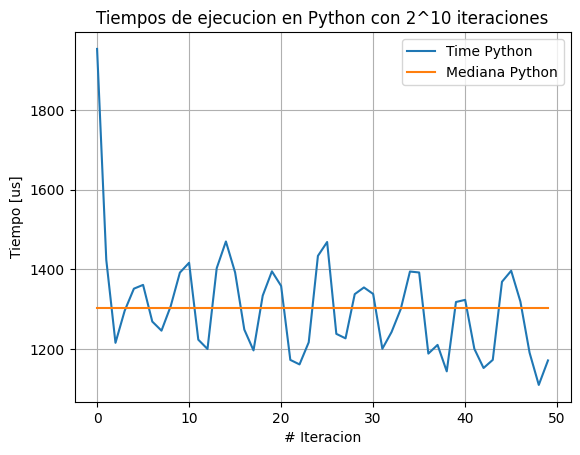

El valor de la mediana es: 1304.2999926256016 us


In [19]:

median_arr_py = median_arr(py_median, iter)
plt.plot(time_py)
plt.plot(median_arr_py)
plt.grid()
plt.legend(["Time Python", "Mediana Python"])
plt.xlabel("# Iteracion")
plt.ylabel("Tiempo [us]")
plt.title("Tiempos de ejecucion en Python con 2^10 iteraciones")
plt.show()
plt.close()
print("El valor de la mediana es:", py_median,"us")

n) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *C*. Incluya la mediana de los tiempos en el gráfico.

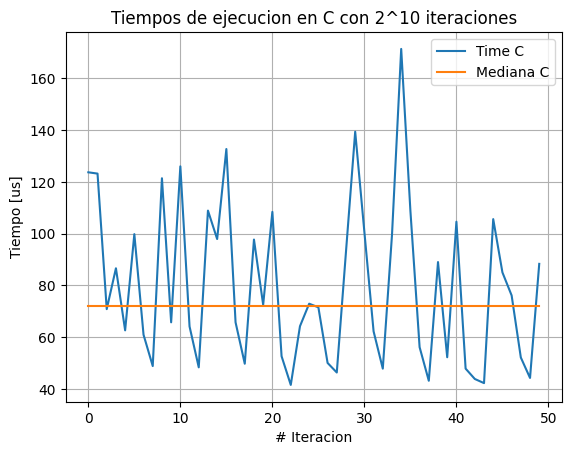

El valor de la mediana es: 72.0000098226592 us


In [20]:
median_arr_c = median_arr(c_median, iter)
plt.plot(time_c)
plt.plot(median_arr_c)
plt.grid()
plt.legend(["Time C", "Mediana C"])
plt.xlabel("# Iteracion")
plt.ylabel("Tiempo [us]")
plt.title("Tiempos de ejecucion en C con 2^10 iteraciones")
plt.show()
plt.close()
print("El valor de la mediana es:", c_median,"us")

o) (0.5 pto) Realizar 50 mediciones de tiempo para las funciones implementadas en *C* y *Python* para el mayor de los tamaños.

In [21]:
arr_size_b = arr_2_pow[9]
time_c_b = []
time_py_b = []
arr_tst = crear_arreglo(arr_size_b)
arr_tst_rdy = np.array(arr_tst, dtype = np.int32)
for i in range(iter):
    tic3 = time.perf_counter()
    c_normalizar_vector(arr_tst_rdy)
    tic2 = time.perf_counter()
    py_normalizar_arreglo(arr_tst_rdy)
    tic1 = time.perf_counter()
    time_c_b.append(1e6*(tic2-tic3))
    time_py_b.append(1e6*(tic1-tic2))
c_median_b = statistics.median(time_c_b)
py_median_b = statistics.median(time_py_b)

p) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *Python*. Incluya la mediana de los tiempos en el gráfico.

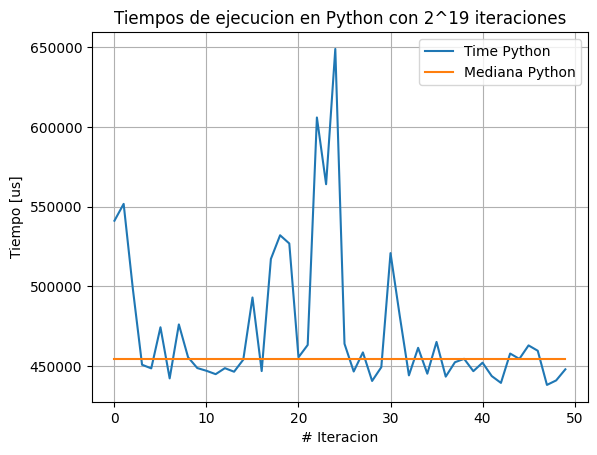

El valor de la mediana es: 454526.00000135135 us


In [22]:
median_arr_py_b = median_arr(py_median_b, iter)
plt.plot(time_py_b)
plt.plot(median_arr_py_b)
plt.grid()
plt.title("Tiempos de ejecucion en Python con 2^19 iteraciones")
plt.legend(["Time Python", "Mediana Python"])
plt.xlabel("# Iteracion")
plt.ylabel("Tiempo [us]")
plt.show()
plt.close()
print("El valor de la mediana es:", py_median_b,"us")

q) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *C*. Incluya la mediana de los tiempos en el gráfico.

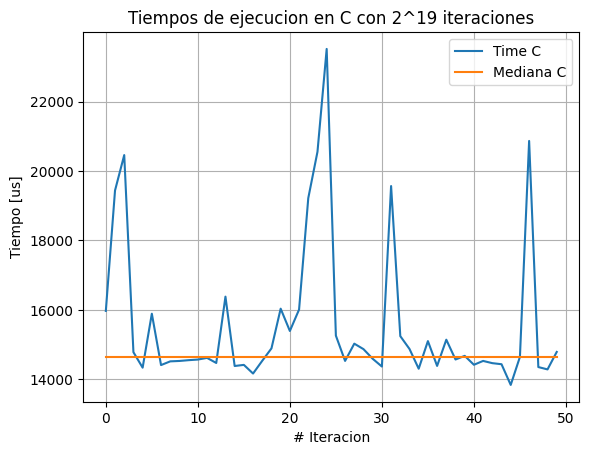

El valor de la mediana es: 14633.800004958175 us


In [23]:
median_arr_c_b = median_arr(c_median_b, iter)
plt.plot(time_c_b)
plt.plot(median_arr_c_b)
plt.title("Tiempos de ejecucion en C con 2^19 iteraciones")
plt.grid()
plt.legend(["Time C", "Mediana C"])
plt.xlabel("# Iteracion")
plt.ylabel("Tiempo [us]")
plt.show()
plt.close()
print("El valor de la mediana es:", c_median_b,"us")

r) (0.5 ptos) Realizar 50 mediciones de tiempo y error relativo para las funciones implementadas en *C* y *Python* para todos los tamaños. El elemento representativo de cada tamaño será la mediana de las 50 mediciones.

In [24]:
elem_rep_py = []
elem_rep_c = []
for n in arr_2_pow:
    arr_size = n
    time_c = []
    time_py = []
    arr_tst = crear_arreglo(arr_size)
    arr_tst_rdy = np.array(arr_tst, dtype = np.int32)
    for i in range(iter):
        tic3 = time.perf_counter()
        c_normalizar_vector(arr_tst_rdy)
        tic2 = time.perf_counter()
        py_normalizar_arreglo(arr_tst_rdy)
        tic1 = time.perf_counter()
        time_c.append(1e6*(tic2-tic3))
        time_py.append(1e6*(tic1-tic2))
    elem_rep_py.append(statistics.median(time_py))
    elem_rep_c.append(statistics.median(time_c))
    

s) (0.5 ptos) Presentar una gráfica de tiempo de ejecución por tamaño a partir de sus mediciones del ítem anterior.

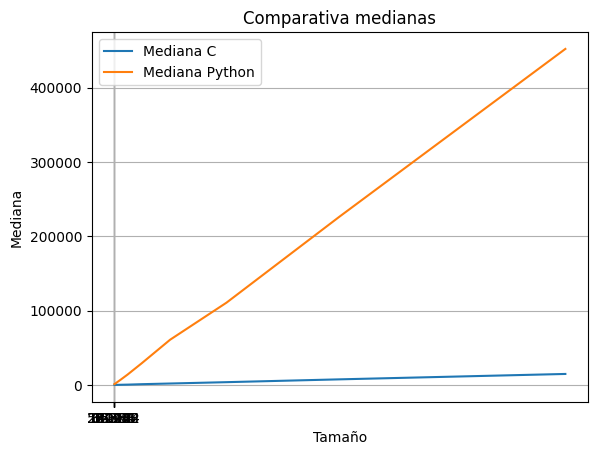

In [29]:
plt.plot(arr_2_pow, elem_rep_c)
plt.plot(arr_2_pow, elem_rep_py)
plt.grid()
plt.legend(["Mediana C", "Mediana Python"])
plt.title("Comparativa medianas")
plt.xlabel("Tamaño")
plt.xticks(range(len(arr_2_pow)), arr_2_pow)
plt.ylabel("Mediana")
plt.show()
plt.close()

t) (0.5 ptos) Presentar una gráfica de speedup por tamaño a partir de sus mediciones.

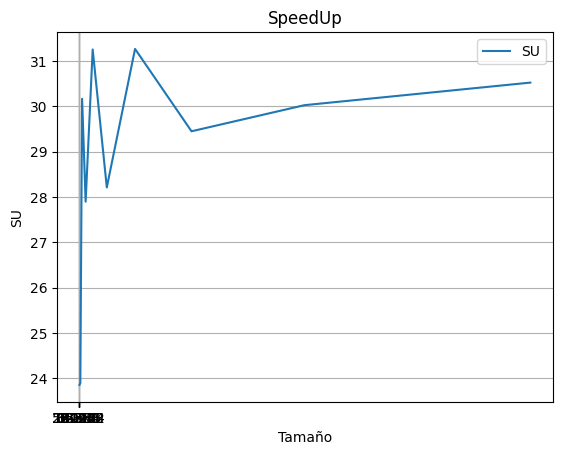

In [26]:
SU = []
for i in range(len(elem_rep_c)):
    SU.append(elem_rep_py[i]/elem_rep_c[i])
plt.plot( arr_2_pow, SU)
plt.grid()
plt.title("SpeedUp")
plt.legend(["SU"])
plt.xlabel("Tamaño")
plt.xticks(range(len(arr_2_pow)), arr_2_pow)
plt.ylabel("SU")
plt.show()
plt.close()

u) (0.5 ptos) Presentar una gráfica de error relativo por tamaño a partir de sus mediciones

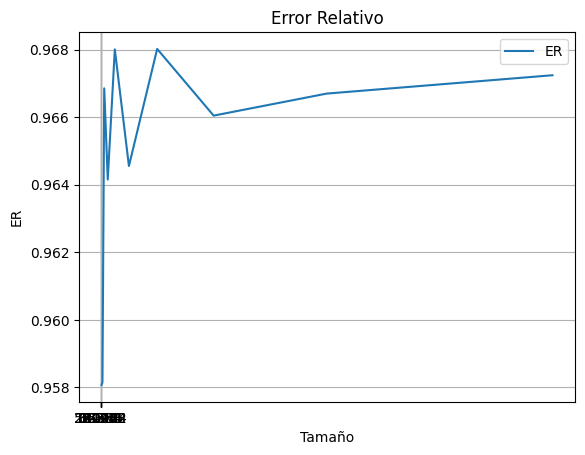

In [28]:
ER = []
for i in range(len(elem_rep_c)):
    err = error_relativo(elem_rep_py[i],elem_rep_c[i])
    ER.append(err)
plt.plot(arr_2_pow, ER)
plt.grid()
plt.title("Error Relativo")
plt.legend(["ER"])
plt.xlabel("Tamaño")
plt.xticks(range(len(arr_2_pow)), arr_2_pow)
plt.ylabel("ER")
plt.show()
plt.close()
